In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/flights.csv"
data_df = pd.read_csv(path, sep = ';', nrows = 1000)


In [ ]:
data_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015,1,1,4,WN,552,N291WN,SAT,ELP,705,...,810.0,30.0,0,0,NaN,1.0,0.0,29.0,0.0,0.0
996,2015,1,1,4,WN,3239,N905WN,TPA,BWI,705,...,907.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
997,2015,1,1,4,WN,1912,N554WN,TUS,DEN,705,...,846.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
998,2015,1,1,4,UA,1660,N17730,SNA,EWR,705,...,1433.0,-51.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_df.groupby(['CANCELLED', 'CANCELLATION_REASON'])['YEAR'].count() #количество отменённых рейсов

CANCELLED  CANCELLATION_REASON
1          A                      11
           B                      72
           C                       1
Name: YEAR, dtype: int64

In [ ]:
#data_df['ORIGIN_AIRPORT' == ANC]
data_df.loc[data_df['CANCELLED'] == 1]['ORIGIN_AIRPORT'].value_counts() #аэропорт, рейсы для которого отменяются наиболее часто 

DFW    6
MAF    3
SGF    2
LEX    1
PIA    1
      ..
CVG    1
TLH    1
MOB    1
MHK    1
DAL    1
Name: ORIGIN_AIRPORT, Length: 76, dtype: int64

In [ ]:
data_df = pd.read_csv(path, sep = ';', nrows = 1000)


In [ ]:
data_df.drop(['YEAR', 'MONTH', 'DAY', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
               'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
               'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
               'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
               'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
               'WEATHER_DELAY'], axis = 'columns').corr()

,DAY_OF_WEEK,CANCELLED
DAY_OF_WEEK,NaN,NaN
CANCELLED,NaN,1.0


In [ ]:
data_df.drop(['YEAR', 'MONTH', 'DAY', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
               'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
               'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
               'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
               'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
               'WEATHER_DELAY'], axis = 'columns').corr('spearman')

,DAY_OF_WEEK,CANCELLED
DAY_OF_WEEK,NaN,NaN
CANCELLED,NaN,1.0


In [ ]:
data_df['SPEED'] = data_df['DISTANCE'] / data_df['ELAPSED_TIME'] #добавление нового столбца
data_df[['FLIGHT_NUMBER', 'SPEED']] #вывод скорости для каждого рейса

,FLIGHT_NUMBER,SPEED
0,98,7.463918
1,2336,8.351254
2,840,7.836177
3,258,8.334520
4,135,6.734884
...,...,...
995,552,5.166667
996,3239,6.790323
997,1912,5.916667
998,1660,8.850909


In [ ]:
data_df.groupby('AIRLINE')['SPEED'].mean().sample(3) #средняя скорость полёта для трёх выбранных авиакомпаний


AIRLINE
B6    5.827510
DL    6.213157
VX    6.079126
Name: SPEED, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_df.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_WEEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLIGHT_NUMBER,NaN,NaN,NaN,NaN,1.000000,0.065010,0.043470,0.010928,0.236016,0.076614,...,-0.192010,0.050953,-0.022104,0.117392,0.050356,0.070777,-0.074988,-0.041210,0.160352,-0.401141
SCHEDULED_DEPARTURE,NaN,NaN,NaN,NaN,0.065010,1.000000,0.778249,0.028418,0.022480,0.932471,...,0.437761,0.018506,0.012100,0.032816,-0.057249,0.014877,0.039630,0.098346,-0.001518,-0.231033
DEPARTURE_TIME,NaN,NaN,NaN,NaN,0.043470,0.778249,1.000000,0.344189,0.032089,0.837393,...,0.418426,0.301090,0.009118,NaN,-0.170655,0.118265,0.426293,0.356636,0.329704,-0.170270
DEPARTURE_DELAY,NaN,NaN,NaN,NaN,0.010928,0.028418,0.344189,1.000000,0.019916,0.362132,...,0.261785,0.909132,-0.014049,NaN,-0.150922,0.175702,0.569079,0.426409,0.449752,0.022420
TAXI_OUT,NaN,NaN,NaN,NaN,0.236016,0.022480,0.032089,0.019916,1.000000,0.106307,...,0.014445,0.219522,0.042977,NaN,0.231361,-0.084918,-0.064013,-0.081216,0.017742,-0.291785
WHEELS_OFF,NaN,NaN,NaN,NaN,0.076614,0.932471,0.837393,0.362132,0.106307,1.000000,...,0.497882,0.336725,0.018406,NaN,-0.144238,0.129576,0.412670,0.340163,0.346575,-0.228970


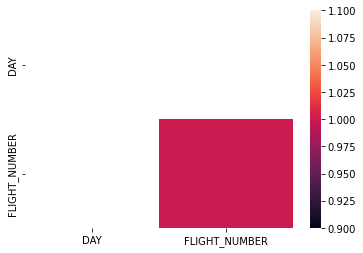

In [ ]:
sns.heatmap(data_df[['DAY', 'FLIGHT_NUMBER']].corr())

In [ ]:
data_df[(data_df['ORIGIN_AIRPORT'] == 'ABE') | (data_df['ORIGIN_AIRPORT'] == 'ABR') | (data_df['ORIGIN_AIRPORT'] == 'ABQ')]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
67,2015,1,1,4,OO,7419,N445SW,ABR,MSP,510,...,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.835821
186,2015,1,1,4,WN,2215,N249WN,ABQ,HOU,600,...,22.0,0,0,NaN,15.0,0.0,7.0,0.0,0.0,5.622222
288,2015,1,1,4,EV,5103,N846AS,ABE,DTW,600,...,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,4.207921
656,2015,1,1,4,EV,5579,N136EV,ABE,ATL,635,...,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.492063
799,2015,1,1,4,WN,897,N427WN,ABQ,DAL,655,...,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.370370
820,2015,1,1,4,MQ,3188,N507MQ,ABQ,ORD,655,...,35.0,0,0,NaN,18.0,0.0,17.0,0.0,0.0,6.462428


In [ ]:
data_df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().tail(3) #время задержки отправки для трёх аэропортов

ORIGIN_AIRPORT
TYS    -4.0
VPS    -4.5
XNA    10.0
Name: DEPARTURE_DELAY, dtype: float64

In [ ]:
data_df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean().tail(3) #время задержки прибытия для трёх аэропортов

ORIGIN_AIRPORT
TYS     4.0
VPS    -9.0
XNA   -10.0
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
data_df[(data_df['AIR_SYSTEM_DELAY'] > 0) & ((data_df['DESTINATION_AIRPORT'] == 'FLL') | (data_df['DESTINATION_AIRPORT'] == 'MCO') | (data_df['DESTINATION_AIRPORT'] == 'BDL'))]
#задержка воздушной системы для аэропортов

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,...,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0,6.759091
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,...,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0,5.760204
55,2015,1,1,4,B6,2276,N646JB,SJU,BDL,438,...,89.0,0,0,NaN,17.0,0.0,72.0,0.0,0.0,6.457364
329,2015,1,1,4,NK,972,N606NK,DFW,FLL,600,...,35.0,0,0,NaN,35.0,0.0,0.0,0.0,0.0,5.858639
446,2015,1,1,4,B6,1554,N760JB,SJU,FLL,610,...,19.0,0,0,NaN,4.0,0.0,15.0,0.0,0.0,6.263473
697,2015,1,1,4,NK,705,N588NK,LGA,FLL,640,...,97.0,0,0,NaN,97.0,0.0,0.0,0.0,0.0,6.148571
959,2015,1,1,4,NK,231,N620NK,ATL,FLL,700,...,17.0,0,0,NaN,17.0,0.0,0.0,0.0,0.0,5.810000
963,2015,1,1,4,NK,198,N621NK,FLL,MCO,700,...,16.0,0,0,NaN,16.0,0.0,0.0,0.0,0.0,2.901639


In [ ]:
data_df[(data_df['SECURITY_DELAY'] > 0) & ((data_df['DESTINATION_AIRPORT'] == 'FLL') | (data_df['DESTINATION_AIRPORT'] == 'MCO') | (data_df['DESTINATION_AIRPORT'] == 'BDL'))]
#задержка системы безопасности

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED


In [ ]:
data_df[(data_df['AIRLINE_DELAY'] > 0) & ((data_df['DESTINATION_AIRPORT'] == 'FLL') | (data_df['DESTINATION_AIRPORT'] == 'MCO') | (data_df['DESTINATION_AIRPORT'] == 'BDL'))]
#задержка авиалиний для аэропортов

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,...,85.0,0,0,NaN,0.0,0.0,85.0,0.0,0.0,6.794286
55,2015,1,1,4,B6,2276,N646JB,SJU,BDL,438,...,89.0,0,0,NaN,17.0,0.0,72.0,0.0,0.0,6.457364
446,2015,1,1,4,B6,1554,N760JB,SJU,FLL,610,...,19.0,0,0,NaN,4.0,0.0,15.0,0.0,0.0,6.263473
941,2015,1,1,4,AA,2393,N3APAA,JFK,MCO,700,...,117.0,0,0,NaN,0.0,0.0,117.0,0.0,0.0,5.102703
950,2015,1,1,4,F9,676,N908FR,DEN,MCO,700,...,58.0,0,0,NaN,0.0,0.0,58.0,0.0,0.0,7.691542


In [ ]:
data_df[(data_df['LATE_AIRCRAFT_DELAY'] > 0) & ((data_df['DESTINATION_AIRPORT'] == 'FLL') | (data_df['DESTINATION_AIRPORT'] == 'MCO') | (data_df['DESTINATION_AIRPORT'] == 'BDL'))]
#поздняя задержка воздушного судна для аэропортов

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
398,2015,1,1,4,B6,1434,N503JB,SJU,MCO,605,...,88.0,0,0,NaN,0.0,0.0,0.0,88.0,0.0,6.497268


In [ ]:
data_df[(data_df['WEATHER_DELAY'] > 0) & ((data_df['DESTINATION_AIRPORT'] == 'FLL') | (data_df['DESTINATION_AIRPORT'] == 'MCO') | (data_df['DESTINATION_AIRPORT'] == 'BDL'))]
#задержка из-за погоды для аэропортов

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED


In [ ]:
pd.set_option('display.max_rows', None)
data_df.groupby(['AIRLINE', 'DEPARTURE_DELAY'])['YEAR'].count()

AIRLINE  DEPARTURE_DELAY
AA       -12.0               1
         -11.0               3
         -10.0               1
         -9.0                2
         -8.0               12
         -7.0                7
         -6.0               10
         -5.0               10
         -4.0               14
         -3.0                9
         -2.0                6
         -1.0                5
          0.0                4
          1.0                2
          3.0                3
          4.0                2
          5.0                1
          6.0                2
          10.0               2
          11.0               1
          13.0               1
          21.0               2
          29.0               1
          33.0               1
          43.0               1
          45.0               1
          53.0               1
          55.0               1
          58.0               1
          68.0               1
          70.0               1
          83.0

In [ ]:
max_dep = data_df['DEPARTURE_DELAY'].max()

In [ ]:
max_dep

364.0

In [ ]:
data_df[data_df['DEPARTURE_DELAY'] == data_df['DEPARTURE_DELAY'].max()]
#авиакомпания с максимальной задержкой по отправке EV

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
484,2015,1,1,4,EV,2522,N879AS,LAW,DFW,615,...,376.0,0,0,NaN,12.0,0.0,364.0,0.0,0.0,2.089552


In [ ]:
max_arr = data_df['ARRIVAL_DELAY'].max()
max_arr

376.0

In [ ]:
data_df[data_df['ARRIVAL_DELAY'] == data_df['ARRIVAL_DELAY'].max()]
#авиакомпания с максимальной задержкой по прибытию EV

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED
484,2015,1,1,4,EV,2522,N879AS,LAW,DFW,615,...,376.0,0,0,NaN,12.0,0.0,364.0,0.0,0.0,2.089552
